# Post Modeling EDA and Analysis
## The purpose of this notebook is to look at insights gained into the modeling process and explore our dataset with these new insights to acheve a deeper understanding of our model and it's features.

In [1]:
#Importing necessary libraries

import pickle  
import pandas as pd
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df=pd.read_csv('Cleanpitcherdataset.csv')

In [3]:
df.shape

(1198, 61)

In [5]:
#Dropping unnecessary column

df.drop(axis=1,labels='Unnamed: 0',inplace=True)

In [14]:

df['Hard%'].describe()

count    1198.000000
mean        0.328373
std         0.050441
min         0.197000
25%         0.291250
50%         0.322000
75%         0.362000
max         0.480000
Name: Hard%, dtype: float64

In [19]:
df['HR'].describe()

count    1198.000000
mean       17.252087
std         7.324321
min         1.000000
25%        12.000000
50%        17.000000
75%        23.000000
max        41.000000
Name: HR, dtype: float64

In [24]:
df['IP'].describe()

count    1198.000000
mean      133.754090
std        49.180703
min        50.200000
25%        88.200000
50%       134.050000
75%       176.000000
max       248.100000
Name: IP, dtype: float64

In [20]:
len(df.loc[(df['HR']>17) & (df['Hard%']>.322),['Name','ERA','FIP','SO','Hard%','HR']])

318

In [36]:
y1=df.loc[(df['HR']>17) & (df['Hard%']>.322) & (df['FBv']>95),['SO']].mean()

In [37]:
y=df.loc[(df['HR']>17) & (df['Hard%']>.322) & (df['FBv']<95),['SO']].mean()

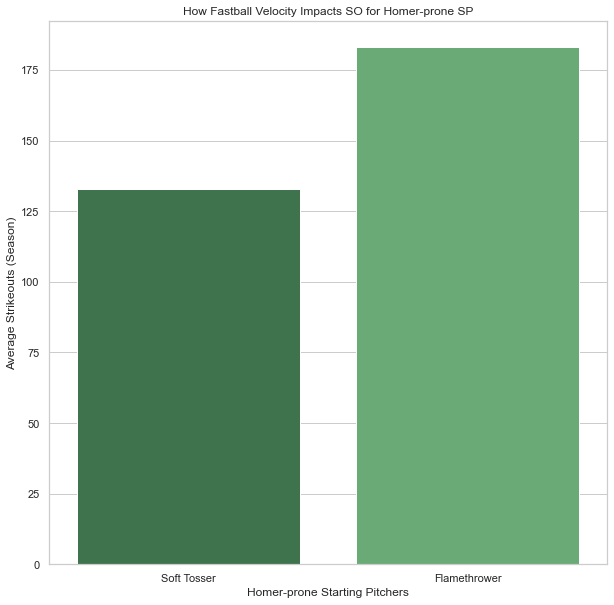

In [120]:
#Creating plot to see how fastball velocity impacts strikeouts for pitchers that are home run prone

fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(x=['Soft Tosser','Flamethrower'],y=[y,y1],palette='Greens_d',ax=ax)
ax.set_xlabel('Homer-prone Starting Pitchers')
ax.set_ylabel('Average Strikeouts (Season)')
ax.set_title('How Fastball Velocity Impacts SO for Homer-prone SP')
fig.savefig('Impact of FB velo on SO for Homerprone Pitchers.png')

## The above graph clearly demonstrates that being a flamethrowing pitcher still leads to far more strikeouts than being a soft-tosser even when the pitchers are homer-prone. In other words, being homer-prone should an exclude a pitcher from consideration by a general manager.

In [48]:
df['BB'].describe()

count    1198.000000
mean       42.667780
std        16.839152
min         6.000000
25%        30.000000
50%        42.000000
75%        54.000000
max        96.000000
Name: BB, dtype: float64

In [49]:
df['Balls'].describe()

count    1198.000000
mean      786.911519
std       269.942846
min       246.000000
25%       546.250000
50%       806.000000
75%      1011.000000
max      1369.000000
Name: Balls, dtype: float64

In [60]:
df['B/P_Ratio']=df['Balls']/df['Pitches']

In [62]:
df['B/P_Ratio'].describe()

count    1198.000000
mean        0.361804
std         0.023134
min         0.269862
25%         0.347162
50%         0.361714
75%         0.376432
max         0.444103
Name: B/P_Ratio, dtype: float64

In [114]:
y3=df.loc[(df['B/P_Ratio']<.347) & (df['IP']>134) & (df['BB']>42),'SO'].mean()

In [115]:
y2=df.loc[(df['B/P_Ratio']>=.347) & (df['IP']>134)&(df['BB']>42),'SO'].mean()

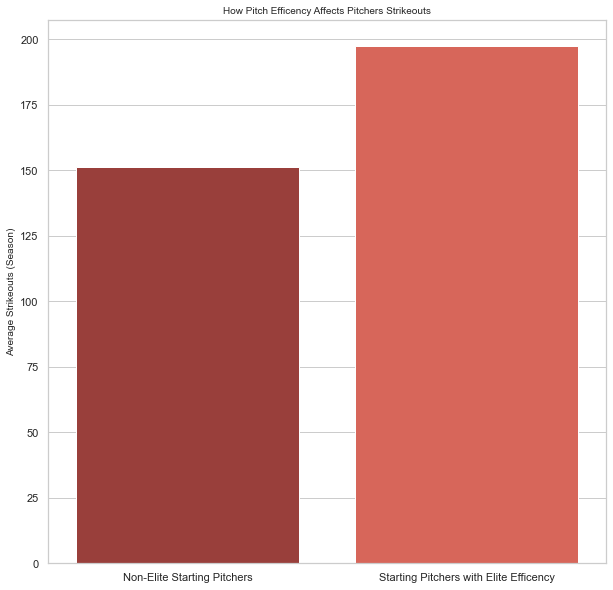

In [124]:
#Creating plot to see how pitch efficiency affects strikeouts for a pitcher

fig,ax=plt.subplots(figsize=(10,10))
sns.barplot(x=['Non-Elite Starting Pitchers','Starting Pitchers with Elite Efficency'],y=[y2,y3],palette='Reds_d',ax=ax)
ax.set_ylabel('Average Strikeouts (Season)',fontsize=10)
ax.set_title('How Pitch Efficency Affects Pitchers Strikeouts',fontsize=10)
fig.savefig('Impact of Pitch efficency on SO for Starting Pitchers.png')

In [72]:
df['IP/GS']=df['IP']/df['GS']

In [89]:
df['IP/GS'].describe()

count    1090.000000
mean        5.860206
std         0.562430
min         2.279310
25%         5.487545
50%         5.846514
75%         6.215630
max         7.310000
Name: IP/GS, dtype: float64

In [87]:
#Statistic is off due to mixed role reliever starters 
#To solve this replacing outliers with median  

df.loc[df['IP/GS']>7.33,['IP/GS']]=df['IP/GS'].median()                      

# 2 Sample  means T test 
# The goal of this test is to determine whether Starting pitchers with elite pitch efficency provide more length in their starts on average than the non elite group.

# Ho: u_elite_IP/GS=u_other_IP/GS
# Ha: u_elite_IP/GS≠u_other_IP/GS

In [105]:
# Elite B/P ratio pitchers
elite_mean=df.loc[(df['B/P_Ratio']<.347) & (df['IP']>134),'IP/GS'].mean()
elite_std=df.loc[(df['B/P_Ratio']<.347) & (df['IP']>134),'IP/GS'].std()
elite_len=len(df.loc[(df['B/P_Ratio']<.347) & (df['IP']>134),'IP/GS'])

In [106]:
other_mean=df.loc[(df['B/P_Ratio']>.347)& (df['IP']>134),'IP/GS'].mean()
other_std=df.loc[(df['B/P_Ratio']>.347)& (df['IP']>134),'IP/GS'].std()
other_len=len(df.loc[(df['B/P_Ratio']>.347)& (df['IP']>134),'IP/GS'])

In [107]:
num=elite_mean-other_mean
denom=np.sqrt(((elite_std**2)/elite_len)+((other_std**2)/other_len))

In [108]:
print(elite_len, other_len)

181 418


In [109]:
Test_stat=num/denom
dof=other_len-1
Test_stat

8.821586888622264

In [110]:
import scipy.stats as scs #assuming alpha=.05
p_val=scs.t.sf(Test_stat,dof)/2
p_val

7.796248262128649e-18

# Between The SP group with elite pitch efficency (B/P ratio) and the non elite group, we did find a statistically significant difference in Innings Pitched to Games Started Ratio. This is proven by our p value of 10^-18 which is much smaller than our threshold of .025 in each tail.

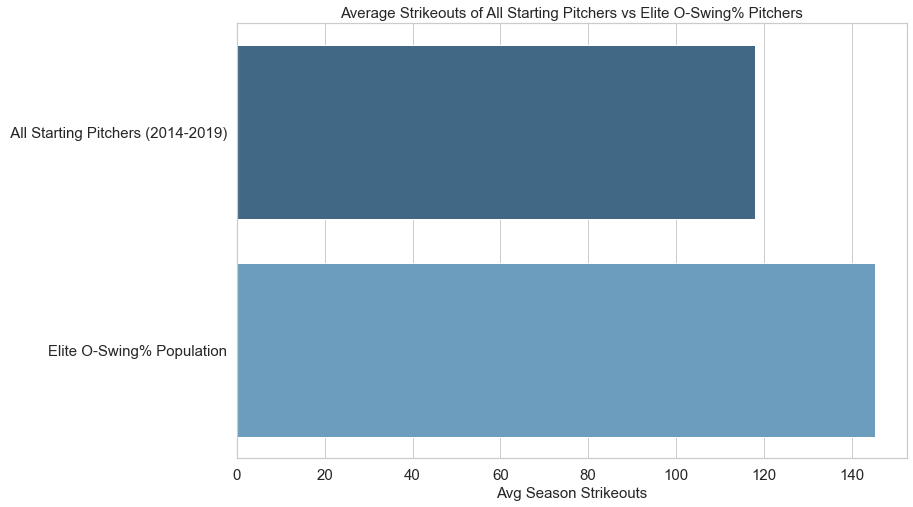

In [153]:
#Creating graph to show how an elite O-Swing% affects strikeouts for a pitcher

High_O=df.loc[(df['O-Swing%']>=.325),'SO'].mean()
Low_O=df['SO'].mean()
fig,ax=plt.subplots(figsize=(12,8))
sns.barplot(y=[' All Starting Pitchers Population (2014-2019)','Elite O-Swing% Population'],x=[Low_O,High_O],orient='h',palette='Blues_d',ax=ax)
ax.set_xlabel('Avg Season Strikeouts',fontsize=15)
ax.set_yticklabels(labels=[' All Starting Pitchers (2014-2019)','Elite O-Swing% Population'],rotation=0,ha='right')
ax.set_title('Average Strikeouts of All Starting Pitchers vs Elite O-Swing% Pitchers',fontsize=15)
ax.tick_params(axis='both',which='major',labelsize=15)
fig.savefig('Average Strikeouts of All Starting Pitchers vs Elite O-Swing% Pitchers.png',bbox_inches='tight')